In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from numpy import diff 

# -- custom stuff -- 
from pygama import DataSet
from pygama.analysis.histograms import *

Plot wf :  1


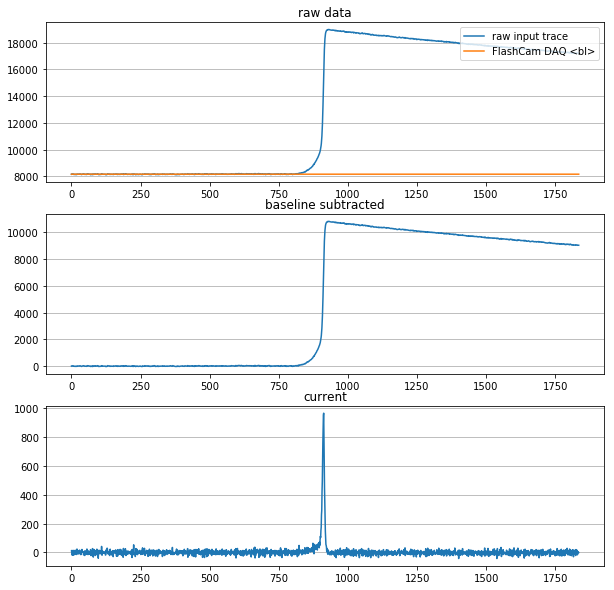

Plot wf :  2


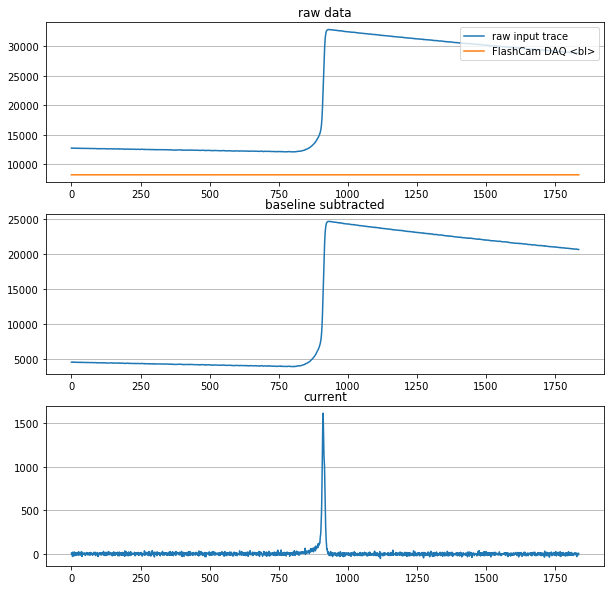

Plot wf :  3


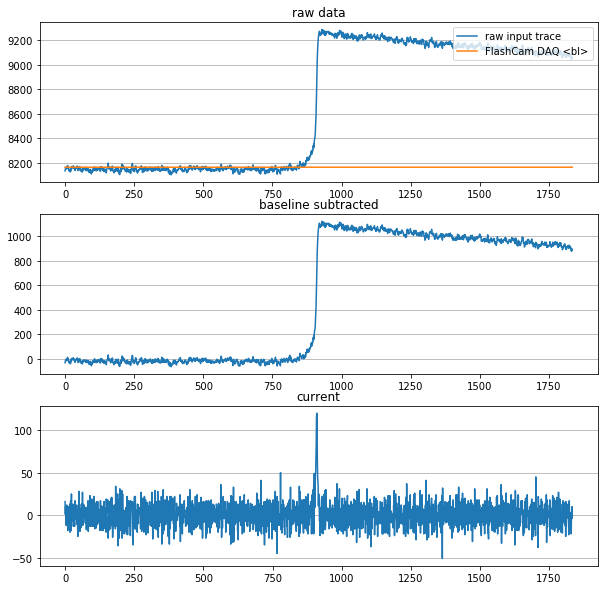

Plot wf :  4


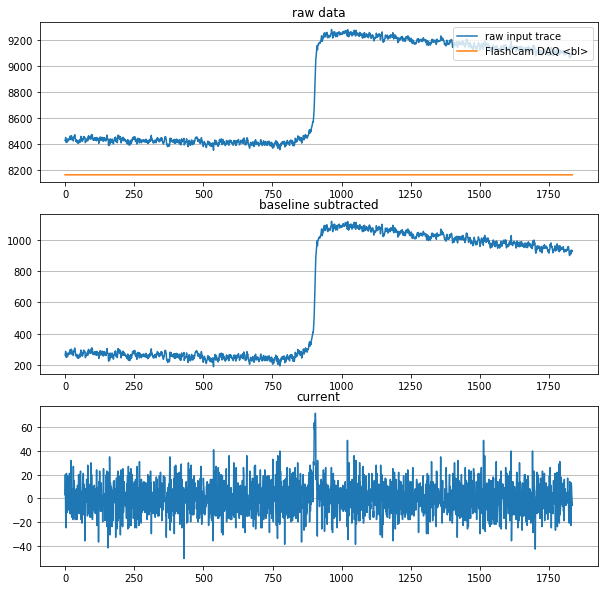

Plot wf :  5


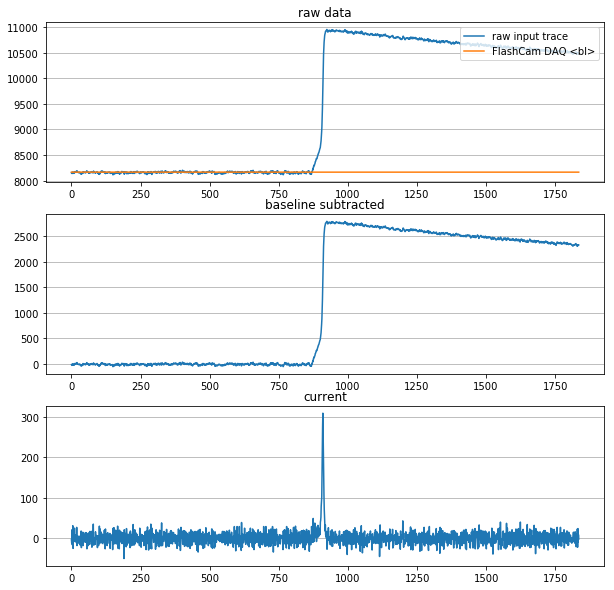

Plot wf :  6


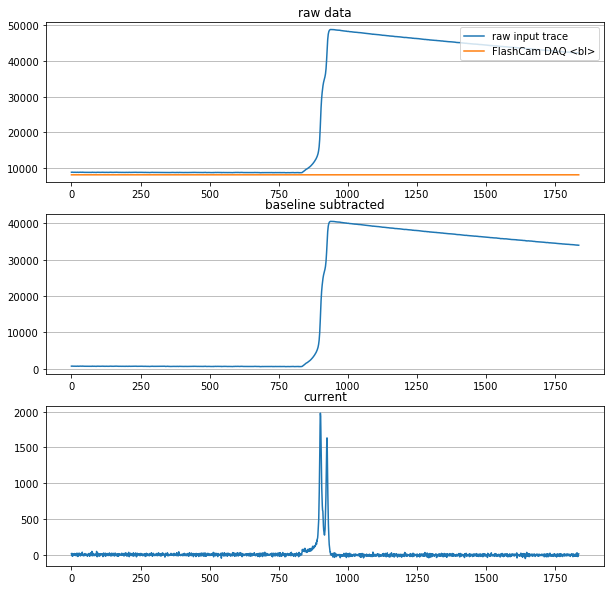

Plot wf :  7


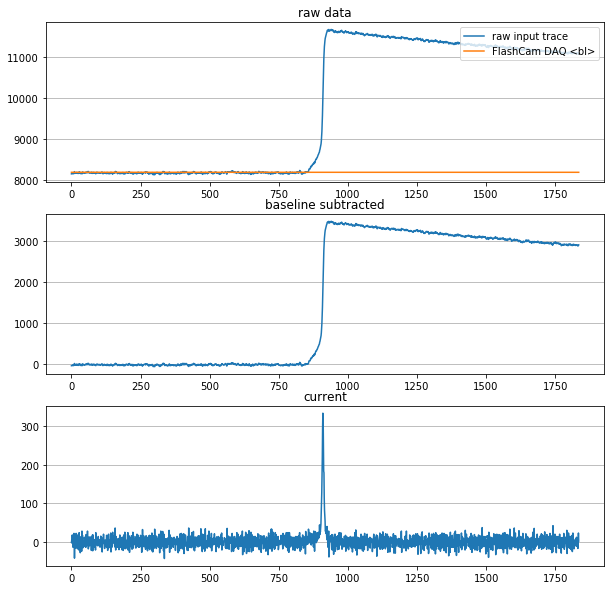

Plot wf :  8


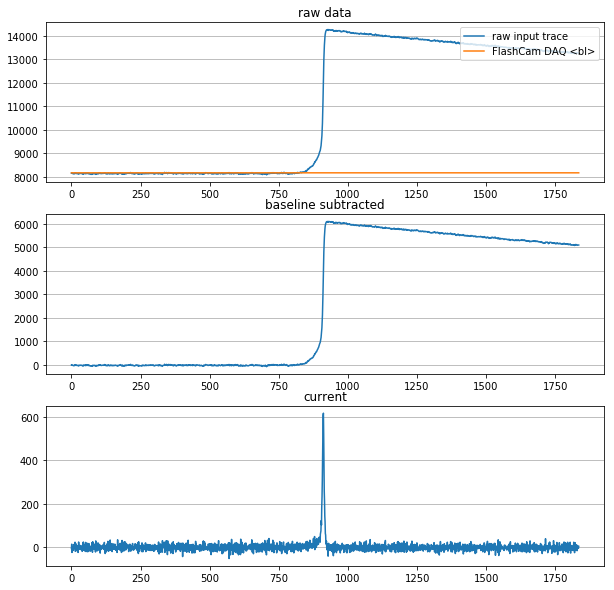

Plot wf :  9


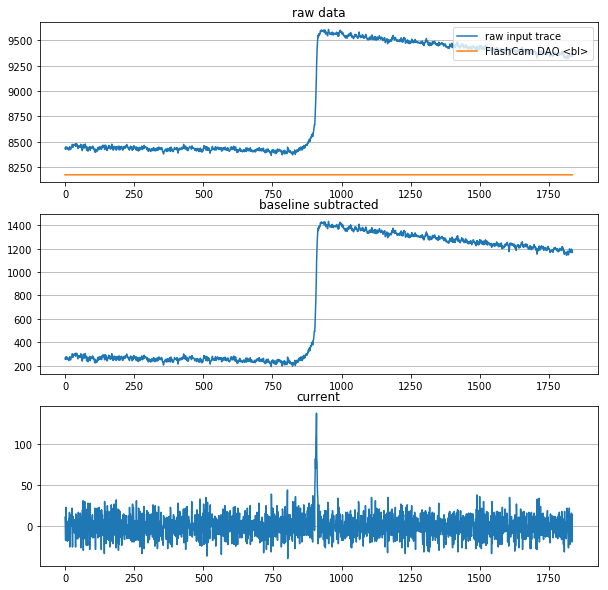

Plot wf :  10


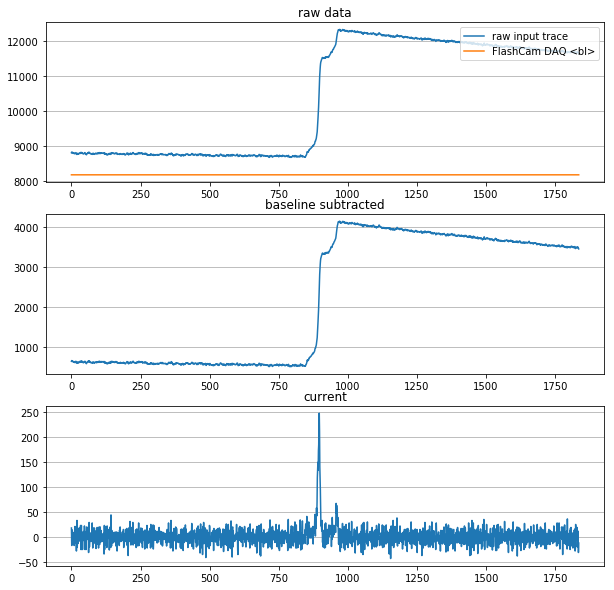

In [10]:
# load the data set and get some basic info in the dataframe

ds = DataSet(runlist=[0], md="./testDB.json")
    
t1df = ds.get_t1df() # be careful, it can be a lot to load in memory

Nstart=1
Nwf=10
    
for wf in range(Nstart,Nstart+Nwf):
    baseline = np.full(1836, t1df.bl[wf])
    print("Plot wf : ",wf)
    line = t1df.loc[wf,:]
    plt.figure(1,figsize=(10,10))
        
    plt.subplot(311)
    plt.grid(axis='y')
    plt.plot(line[8:])
    plt.plot(baseline)
    plt.title('raw data')
    plt.legend(('raw input trace','FlashCam DAQ <bl>'),loc='upper right')
        
    plt.subplot(312)
    plt.grid(axis='y')
    plt.plot(line[8:]-t1df.bl[wf])
    plt.title('baseline subtracted')
        
    plt.subplot(313)
    plt.grid(axis='y')
    plt.plot(diff(line[8:]))
    plt.title('current')
        
    plt.show()

In [11]:
print("load tier2 dataset")
t2df = ds.get_t2df() # be careful, it can be a lot to load in memory
print(t2df.columns)

load tier2 dataset
Index(['bl', 'bl0', 'bl1', 'channel', 'energy', 'ievt', 'packet_id', 'bl_rms',
       'bl_p0', 'bl_p1', 'etrap_max', 'etrap_imax', 'strap_max', 'strap_imax',
       'atrap_max', 'atrap_imax', 'ttrap_max', 'ttrap_imax', 'savgol_max',
       'savgol_imax', 'current_max', 'current_imax', 'tp5', 'tp10', 'tp50',
       'tp100', 'n_curr_pks', 's_curr_pks', 't0', 't_ftp', 'e_ftp', 'overflow',
       'tslope_savgol', 'tslope_pz', 'tail_amp', 'tail_tau'],
      dtype='object')


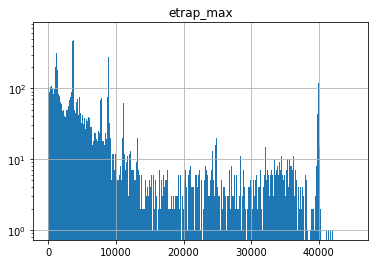

In [12]:
# plot directly from the pd.DataFrame

xlo, xhi, xpb = 0, 45000, 45
t2df.hist("etrap_max", bins=int((xhi-xlo)/xpb), range=(xlo, xhi),log=True)
plt.show()

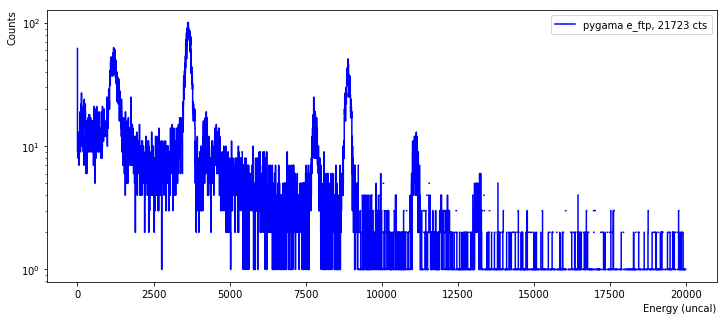

In [5]:
# make a simple plot with matplotlib and np.histogram

xlo, xhi, xpb = 0, 20000, 5
nbins = int((xhi-xlo)/xpb)

arr = t2df["etrap_max"]

hist, bins = np.histogram(arr, nbins, (xlo, xhi))

# annoying - have to add an extra zero
hist = np.concatenate((hist, [0]))

plt.figure(figsize=(12,5))
plt.semilogy(bins, hist, ls='steps', lw=1.5, c='b', label="pygama e_ftp, {} cts".format(sum(hist)))
plt.xlabel("Energy (uncal)", ha='right', x=1)
plt.ylabel("Counts", ha='right', y=1)
plt.legend()
plt.show()

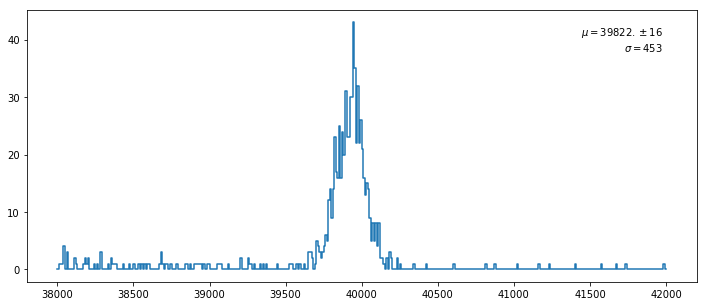

In [6]:
# make a histogram with pygama's built in functions

xlo, xhi, xpb = 38000, 42000, 10
nbins = int((xhi-xlo)/xpb)

arr = t2df["etrap_max"]

hist, bins, var = get_hist(arr, range=(xlo, xhi), dx=xpb)

import pygama.analysis.calibration as pgc
import pygama.utils as pgu
pars, cov = pgc.fit_hist(pgc.gauss, hist, bins, var=var, guess=[40000, 20, 100])
# pgu.plot_func(pgc.gauss, pars)

plt.figure(figsize=(12,5))
plot_hist(hist, bins, show_stats=True)

In [7]:
# try out some more pygama functionality